## Тестовые гиперссылки

In [1]:
#Libraries

import streamlit as st
import pandas as pd
import plotly.graph_objects as go


def create_link(url:str) -> str:
    return f'''<a href="{url}">🔗</a>'''


#test dataframe
test_df = pd.DataFrame(
    {"Site": "DuckDuckGo Google Bing".split(),
     "URL": "https://duckduckgo.com/ https://www.google.com/ https://www.bing.com/".split()}
)

test_df['Link'] = [create_link(url) for url in test_df["URL"]]
test_df

,Site,URL,Link
0,DuckDuckGo,https://duckduckgo.com/,"<a href=""https://duckduckgo.com/"">🔗</a>"
1,Google,https://www.google.com/,"<a href=""https://www.google.com/"">🔗</a>"
2,Bing,https://www.bing.com/,"<a href=""https://www.bing.com/"">🔗</a>"


Пример ссылок со смайликами:
'<a href="https://shap.readthedocs.io/en/latest/index.html">🔗</a>\n<a href="https://interpret.ml/docs/shap.html">🔗</a>or see <a href="https://explainerdashboard.readthedocs.io/en/latest/dashboards.html">🔗</a>'

Пример ссылок с тесктом:
'<a href="https://shap.readthedocs.io/en/latest/index.html">shap</a>\n<a href="https://interpret.ml/docs/shap.html">interpret_ml</a>or see <a href="https://explainerdashboard.readthedocs.io/en/latest/dashboards.html">explainer dashboard</a>'

## Find a way to make your AI explainable

Здесь вы можете найти библиотеку, предлагающую методы интерпретации моделей, под свою задачу. 

Классификация библиотек была реализована с учетом практических характеристик, влияющих на возможность и невозможность использовать соответствующие методы интерпретации. Было выявлено, что при практическом использовании выбор конкретной библиотеки будет зависеть от:
- типа данных, на которых обучена модель
- фреймворка, с помощью которого модель была обучена

Соответственно, именно такая фильтрация реализована здесь. 

Полезные ресурсы об Explainable AI:
- Free book ["Interpretable Machine Learning"](https://christophm.github.io/interpretable-ml-book/) by Christoph Molnar

In [20]:
#merged the general table
merged_table = pd.read_csv('./data/merged_table2.csv', index_col=0)

merged_table.tail()

,Library,Hyperlink,Framework,DataType
22,shapash,"<a href=""https://github.com/MAIF/shapash#how_s...","scikit-learn, XGBoost, LightGBM, CatBoost",Tabular
23,AIX360,"<a href=""https://github.com/Trusted-AI/AIX360""...","scikit-learn, tensorflow","Texts, Images, Tabular"
24,OMNIXai,"<a href=""https://github.com/salesforce/OmniXAI...","Keras, pytorch","Texts, Images, Tabular, Time Series"
25,saliency,"<a href=""https://github.com/pair-code/saliency...","tensorflow, pytorch",Images
26,dalex,"<a href=""https://dalex.drwhy.ai/#api-reference...","tensorflow, pytorch, keras, h2o, xgboost, auto...",Tabular


In [21]:
def filter_dataframe(data, framework=None, dtype=None):

    if framework and dtype:
        to_schow = data[(data['Framework'].apply(lambda x: True if framework.lower() in x.lower() else False)) & (data['DataType'].apply(lambda x: True if dtype in x else False))]

    elif framework:
        to_schow = data[data['Framework'].apply(lambda x: True if framework in x else False)]
        

    elif dtype:
        to_schow = data[data['DataType'].apply(lambda x: True if dtype in x else False)]

    return to_schow
    

In [27]:
filter_dataframe(merged_table, 'Keras', 'Tabular')

,Library,Hyperlink,Framework,DataType
0,eli5,"<a href=""https://eli5.readthedocs.io/en/latest...","scikit-learn, XGBoost, LightGBM, CatBoost, Ker...","Texts, Images, Tabular, Graph"
2,shap,"<a href=""https://shap.readthedocs.io/en/latest...","scikit-learn, XGBoost, LightGBM, CatBoost,Kera...","Texts, Images, Tabular, Genomic"
4,SALib,"<a href=""https://salib.readthedocs.io/en/lates...",Keras,Tabular
5,LIME,"<a href=""https://github.com/marcotcr/lime?yscl...","scikit-learn, Keras, tensorflow, pytorch","Texts, Images, Tabular"
7,dice-ml,"<a href=""https://interpret.ml/DiCE/dice_ml.htm...","scikit-learn, Keras, tensorflow, pytorch",Tabular
12,skater (DOESN'T WORK 13.01.24),"<a href=""https://github.com/oracle/Skater?yscl...","scikit-learn, XGBoost, Keras","Texts, Images, Tabular"
18,Permutation Importance,"<a href=""https://permutationimportance.readthe...","scikit-learn, Keras","Texts, Tabular"
19,Quantus,"<a href=""https://github.com/understandable-mac...","Keras, tensorflow, pytorch, transformers","Images, Tabular"
24,OMNIXai,"<a href=""https://github.com/salesforce/OmniXAI...","Keras, pytorch","Texts, Images, Tabular, Time Series"
26,dalex,"<a href=""https://dalex.drwhy.ai/#api-reference...","tensorflow, pytorch, keras, h2o, xgboost, auto...",Tabular


In [71]:
frameworks_list = merged_table['Framework'].value_counts().index.to_list()
frameworks_list = [x.split(',') for x in frameworks_list]

In [72]:
merged_list = []

# Проходим по каждому списку в основном списке
for sublist in frameworks_list:
    # Добавляем элементы текущего списка в новый список
    merged_list.extend(sublist)

In [75]:
[i.replace(' ', '') for i in set(merged_list)]

['skorch',
 'scikit-learn',
 'SciPy',
 'LightGBM',
 'tensorflow',
 'XGBoost',
 'lightning',
 'sklearn-crfsuite',
 'Keras',
 'Keras',
 'pytorch',
 'transformers',
 'pyspark',
 'pytorch',
 'CatBoost',
 'tensorflow',
 'transformers']

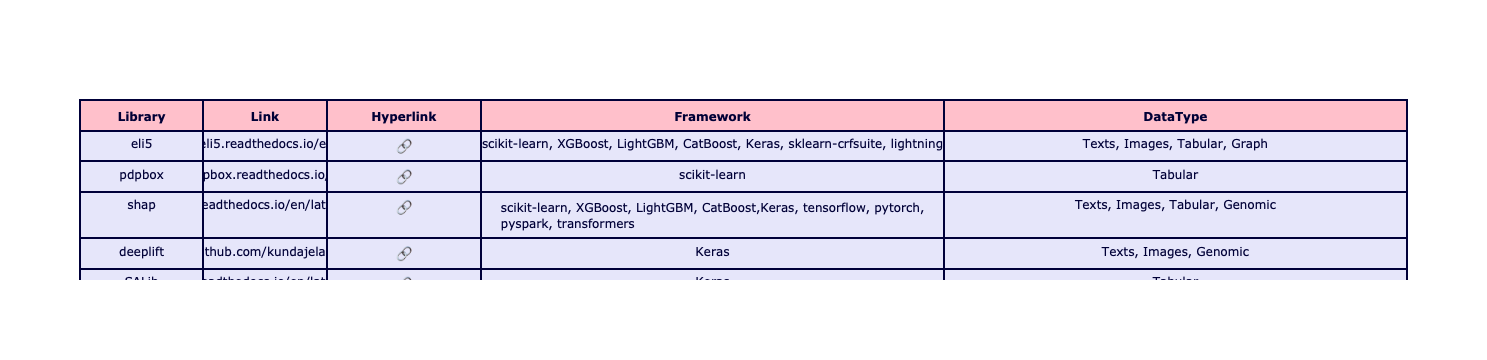

In [55]:
fig = go.Figure(
    data=[
        go.Table(
            columnwidth = [0.8, 0.8, 1, 3],
            header=dict(
                values=[f"<b>{i}</b>" for i in merged_table.columns.to_list()],
                fill_color='pink'
                ),
            cells=dict(
                values=merged_table.transpose(), fill_color='lavender'),
            )
        ]
    )
fig.show()

In [56]:
merged_table.drop('Link', axis=1, inplace=True)

merged_table

,Library,Hyperlink,Framework,DataType
0,eli5,"<a href=""https://eli5.readthedocs.io/en/latest...","scikit-learn, XGBoost, LightGBM, CatBoost, Ker...","Texts, Images, Tabular, Graph"
1,pdpbox,"<a href=""https://pdpbox.readthedocs.io/en/late...",scikit-learn,Tabular
2,shap,"<a href=""https://shap.readthedocs.io/en/latest...","scikit-learn, XGBoost, LightGBM, CatBoost,Kera...","Texts, Images, Tabular, Genomic"
3,deeplift,"<a href=""https://github.com/kundajelab/deeplif...",Keras,"Texts, Images, Genomic"
4,SALib,"<a href=""https://salib.readthedocs.io/en/lates...",Keras,Tabular
5,LIME,"<a href=""https://github.com/marcotcr/lime?yscl...","scikit-learn, Keras, tensorflow, pytorch","Texts, Images, Tabular"
6,interpretML,"<a href=""https://interpret.ml/docs/intro.html""...",scikit-learn,Tabular
7,dice-ml,"<a href=""https://interpret.ml/DiCE/dice_ml.htm...","scikit-learn, Keras, tensorflow, pytorch",Tabular
8,interpret-text,"<a href=""https://github.com/interpretml/interp...","scikit-learn, pytorch",Texts
9,treeinterpreter,"<a href=""https://github.com/andosa/treeinterpr...",scikit-learn,Tabular


In [58]:
merged_table.to_csv('./data/merged_table.csv')

In [44]:
merged_table['Data type '] #.apply(lambda x: True if 'Texts' in x else False)

0           Texts, Images, Tabular, Graph
1                                 Tabular
2         Texts, Images, Tabular, Genomic
3                  Texts, Images, Genomic
4                                 Tabular
5                  Texts, Images, Tabular
6                                 Tabular
7                                 Tabular
8                                   Texts
9                                 Tabular
10                                Tabular
11                 Texts, Images, Tabular
12                 Texts, Images, Tabular
13                          Texts, Images
14                                  Texts
15                                  Graph
16                 Texts, Images, Tabular
17                 Texts, Images, Tabular
18                         Texts, Tabular
19                        Images, Tabular
20                 Texts, Images, Tabular
21                 Texts, Images, Tabular
22                                Tabular
23                 Texts, Images, 

**Описание методов:**

- Microscope AI - methods that make it possible to consider the influence of specific feature values on the prediction.
- Model understating - methods that make it possible to see the decision-making process on each single sample.
- Model debugging — methods for making detail missсlassification analysis and and for the depth analysis of features.